# Squat

In [32]:
import pandas as pd

df_squat = pd.read_csv('231020_22h03m_squart_train_scaled_with_label_only_angle_ver.csv')
df_squat

,angle_right_leg,angle_left_leg,xy_angle_right_leg,xy_angle_left_leg,label
0,1.654231,1.434396,1.988904,1.945029,1
1,1.675573,1.529931,1.980144,1.931381,1
2,1.629415,1.524911,1.988709,1.956213,1
3,1.679213,1.517000,1.962819,1.925315,1
4,0.435603,0.455009,1.512945,1.593593,5
...,...,...,...,...,...
507,1.839193,1.716741,1.984816,1.996398,2
508,1.828770,1.730889,1.988709,1.991660,2
509,1.880387,1.805279,1.979560,1.996019,2
510,1.831913,1.714155,1.981507,1.998673,2


In [70]:
X_labeled = df_squat.drop('label', axis=1)
y_labeled = df_squat['label']
X_labeled.shape, y_labeled.shape

((512, 4), (512,))

In [71]:
# 1, 2, 4, 5는 0으로, 0, 3는 1로
y_labeled = y_labeled.replace([0, 3], 9)
y_labeled = y_labeled.replace([1, 2, 4, 5], 0)
y_labeled = y_labeled.replace([9], 1)

In [72]:
# y_labeled = y_labeled.replace([0, 1, 2, 4], 0)
# y_labeled = y_labeled.replace([3, 5], 1)

In [73]:
y_labeled[y_labeled == 0].count(), y_labeled[y_labeled == 1].count(), y_labeled[y_labeled == 2].count(), y_labeled[y_labeled == 3].count(), y_labeled[y_labeled == 4].count(), y_labeled[y_labeled == 5].count()

(425, 87, 0, 0, 0, 0)

In [74]:
y_labeled.unique()

array([0, 1])

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_2labels = KNeighborsClassifier(n_neighbors=2)
knn_classifier_2labels.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [77]:
# knn_classifier_6labels = KNeighborsClassifier(n_neighbors=6)
# knn_classifier_6labels.fit(X_train, y_train)

In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
import xgboost as xgb

xbc = xgb.XGBClassifier(
    n_estimators=100,  # 트리 개수 (나무 개수)
    max_depth=3,       # 트리의 최대 깊이
    learning_rate=0.1, # 학습률 (보통 작은 값을 선택)
    random_state=42    # 랜덤 시드
)

# 모델 학습
xbc.fit(X_train, y_train)

/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [80]:
from sklearn.ensemble import VotingClassifier

# 앙상블 모델 정의 (다수결 투표)
ensemble_model = VotingClassifier(
    estimators=[
        ('knn', knn_classifier_2labels),
        ('rfc', rfc),
        ('xbc', xbc)
    ],
    voting='hard'
)

# 앙상블 모델 학습
ensemble_model.fit(X_train, y_train)

/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=2)),
                             ('rfc', RandomForestClassifier()),
                             ('xbc',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))])

In [81]:
from sklearn.metrics import accuracy_score


y_pred = ensemble_model.predict(X_test)

# 분류 결과 출력
print("데이터의 예측 결과:", y_pred)

# 정확도 출력
print("정확도:", accuracy_score(y_test, y_pred))

데이터의 예측 결과: [0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
정확도: 0.9902912621359223


/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int

In [82]:
print(y_pred[y_test!= y_pred])
print(y_test[y_test!= y_pred])

[0]
281    1
Name: label, dtype: int64


In [83]:
y_test[y_test == 0].count(), y_test[y_test == 1].count(), y_test[y_test == 2].count(), y_test[y_test == 3].count(), y_test[y_test == 4].count(), y_test[y_test == 5].count()

(82, 21, 0, 0, 0, 0)

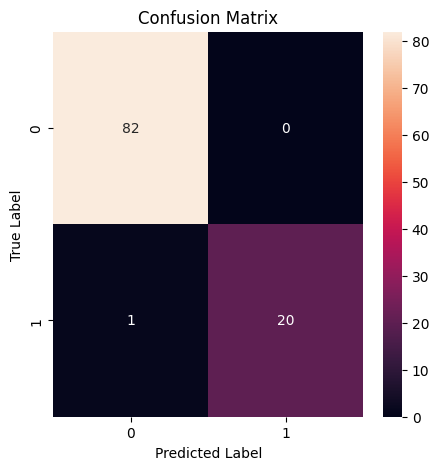

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      0.95      0.98        21

    accuracy                           0.99       103
   macro avg       0.99      0.98      0.98       103
weighted avg       0.99      0.99      0.99       103



In [84]:
from sklearn.metrics import confusion_matrix, f1_score


confusion_matrix(y_test, y_pred)
# f1_score(y_test, y_pred, average='weighted')

# plot confusion matrix and scores
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))